## Implementacion Ising

Explicacion del Algoritmo ocupado:

#### Pseudocodigo del Algoritmo MCMC para $ (X_n)_{n \in \mathbb{N}}$
1. `Input`: $N$, $\beta$ y $nf$

2. `Output`: $nf$ pasos de la cadena $(X_n)_{n \in \mathbb{N}} \sim CdM(μ, P)$

3. Estado Inicial $\leftarrow$ Matriz de dimension $2N + 1$ con spin en el borde = 1 y con Ley 2 Bernoulli(p) - 1
   en las demas casillas de tener un spin 1 o -1.

4. $X_0$ $\leftarrow$ Estado Inicial

5. $nf$ uniformes $U_k, V_k$

6. Para $n$ (`indice`) en $[0,nf-1]$:
   - $x \leftarrow X_n $
   
   - $Y_{n+1} \leftarrow f(V_{n+1}, X_n)$ ($f$ funcion de transicion)

   - Si se verifica $U_{n+1} \leq \frac{\pi_y R_{yx}}{\pi_x R_{xy}}$:
      - $X_{n+1} \leftarrow Y_{n+1} $
   - Si no:
      - $X_{n+1} \leftarrow x $


7. Fin del algoritmo.

In [112]:
import numpy as np
def crear_EN(N: int, p: float):
    '''
    Inicia con binomial(0.2), y coloca 1 en los bordes de la matriz cuadrada, y 0 en los demás. 

    Parámetros
    ----------
    N : int
        Tamaño de la matriz

    p : float
        Parámetro de la Bernoulli.

    Retorno
    -------
    E : np.ndarray
        Matriz con 1 en los bordes y 0 en el interior.
    
    Ejemplo
    -------
    >>> crear_EN(4, 0.5)
    array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]]) 
    '''
    E = 2 * np.random.binomial(1, p, (N,N)) - 1
    
    for i in range(N):
        E[0, i] = 1
        E[i, 0] = 1
        E[-1, i] = 1
        E[i, -1] = 1
    return E

def son_vecinos(x: np.ndarray, y: np.ndarray):
    '''
    Revisa si las matrices x,y son vecinos (difieren en un solo valor en el interior).

    Parámetros
    ----------
    x : np.ndarray
        Matriz 1.
    y : np.ndarray
        Matriz 2.
    
    Retorno
    -------
    bool_son_vecinos : bool
        True o False si son vecinos o no.

    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [ 1,  1, -1,  1],
        [ 1,  1,  1,  1]])
    >>> son_vecinos(x,y)
    True
    '''
    N = len(x)
    son_vecinos = True

    # Revisar si son iguales
    if np.all(x == y) == True:
        son_vecinos = False

    else:
        # Revisar si difieren en más de 1 punto
        diff_count = 0
        for i in range(N):
            for j in range(N):
                if x[i, j] != y[i, j]:
                    diff_count += 1

                    # Si hay más de una diferencia, retornar False
                    if diff_count > 1:
                        son_vecinos = False
    return son_vecinos

def numero_de_vecinos(N: int):
    '''
    Retorna el número de vecinos de una matriz de NxN.

    Parámetros
    ----------
    N : int
        Tamaño matriz, que debe ser mayor a 3.
    
    Retorno
    -------
    cantidad_vecinos : int
        Cantidad de vecinos.
    
    Ejemplo
    -------
    >>> numero_de_vecinos(5)
    9
    '''
    cantidad_de_nodos_en_borde = 4*N - 4
    cantidad_total_de_nodos = N**2
    cantidad_vecinos = cantidad_total_de_nodos - cantidad_de_nodos_en_borde
    return cantidad_vecinos

def funcion_R_metropolis(x, y):
    '''
    Crea la función asociada a la matriz estocástica R, asociada al grafo G según el algoritmo de Metropolis.

    Parámetros
    ----------
    x : np.ndarray
        Matriz de -1 y 1
    y : np.ndarray
        Matriz de -1 y 1
    
    Retorno
    -------
    valor_R : np.ndarray
        Valor R[x,y] asociada a la matriz estocástica R, asociada al grafo G.
    
    Ejemplo
    -------
    >>> x = np.array([[ 1,  1,  1,  1],
       [ 1,  1,  1,  1],
       [ 1,  1, -1,  1],
       [ 1,  1,  1,  1]])
    >>> y = np.array([[ 1,  1,  1,  1],
            [ 1,  1,  1,  1],
            [ 1,  -1, -1,  1],
            [ 1,  1,  1,  1]])
    >>> funcion_R_metropolis(x, y)
    0.25
    '''
    N = len(x)
    if son_vecinos(x,y) == True:
        valor_R = 1 / numero_de_vecinos(N)
    else:
        valor_R = 0
    return valor_R

In [3]:
def funcion_transicion(R, x: np.ndarray) -> int:
    '''
    Función de transición asociada a la función R (representando matriz estocástica), es decir, f: E x [0,1]^n -> E.
    Realiza un solo paso.

    Parámetros
    ----------
        R : function
            Función asociada a la matriz estocástica de transición.
        x : np.ndarray
            Nodo inicial.

    Retorno
    -------
        nodo_actual : np.ndarray
            Nodo al que transiciona finalmente.
        
    Ejemplo
    -------
    >>> ejemplo_R = lambda x,y: 0.4
    >>> ejemplo_x = np.ones(shape=(5,5))
    >>> funcion_transicion(ejemplo_R, ejemplo_x, ejemplo_u)
    array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1., -1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])
    '''
    n = len(x)
    nodo_final = np.copy(x)
    i = np.random.randint(1, n-2)
    j = np.random.randint(1, n-2)
    nodo_final[i,j] = -nodo_final[i,j]
    return nodo_final

def funcion_H(x: np.ndarray):
    '''
    Función H.

    Parámetros
    ----------
    x : np.ndarray
        Parámetro.

    Retorno : float
        Valor H(x) en los reales.
    '''
    N = len(x)
    suma = 0

    # Se suma derecha y abajo 
    for i in range(N - 1):
        for j in range(N - 1):
            suma += (x[i,j] - x[i+1, j])**2 + (x[i,j] - x[i, j+1])**2

    # Se rellena la última fila y última columna
    for i in range(N - 1):
        suma += (x[N-1,i] - x[N-1, i+1])**2 + (x[i, N-1] - x[i+1, N-1])**2
    return suma

def Ising(n: int, beta: float, nf: int, p=2/3):
    # n, beta, nf
    '''
    Usando el método de Metropolis-Hasting, simula una CdM(μ, P) con P asociada a la distribución invariante pi.

    Parámetros
    ----------
    n : int
        Número de nodos desde -n, ..., 0 ,..., n.

    beta : float
        Parámetro de

    nf : int
        Número de pasos a simular.

    Retorno
    -------
    X : np.ndarray
        Arreglo con los valores de la CdM en cada paso.
    
    Ejemplo
    -------
    >>> nodos = 7
    >>> pasos = 8
    >>> beta = 1.2
    >>> X = Ising(nodos, beta, pasos, p=0.6)

    >>> for i in range(pasos-1):
    >>>     fila, columna = np.where(X[i+1]-X[i])
    >>>     print(f"[i],[j] = {fila},{columna}")
    '''
    u = np.random.uniform(size=nf)

    # Estado inicial
    X0 = crear_EN(2*n + 1, p)
    X = []
    X.append(X0) # Nodo actual
    for n in range(nf - 1): 
        Y = funcion_transicion(funcion_R_metropolis, X[0])
        if u[n+1] <= np.exp(- beta * (funcion_H(Y) - funcion_H(X[0]))):
            X = [Y]
    return X


In [121]:
import matplotlib.pyplot as plt
def plotear_cadena(X):
    '''
    Grafica una cadena cada N pasos. Blanco es 1 y negro es -1.

    Parámetros
    ----------
    X : list
        Arreglo que representa la cadena de Markov.
    N : int
        Cada cuántos pasos se plotea.

    Retorno
    -------
    None
    '''
    plt.figure(figsize=(6, 6))
    plt.imshow(X[0], cmap='gray', vmin=-1, vmax=1, origin='lower')
    plt.colorbar()
    plt.title(f"Estado final de la Cadena de Markov de Ising")
    plt.xlabel("Columnas")
    plt.ylabel("Filas")
    plt.show()
    return 

### Graficos de prueba 

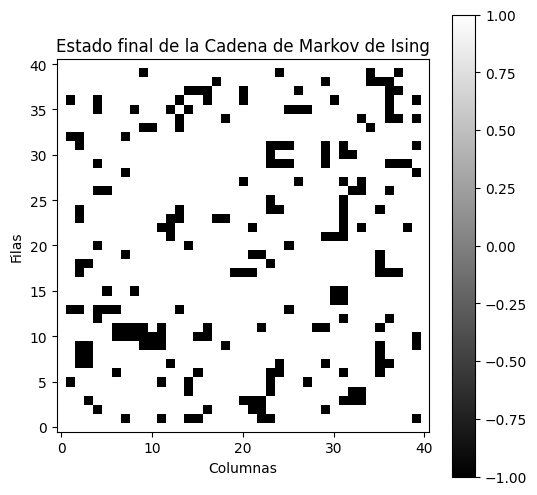

In [127]:
nodos = 20
pasos = 1000
beta = 3

X_1 = Ising(nodos, beta, pasos, p=0.8)
plotear_cadena(X_1)


### Worley Noise

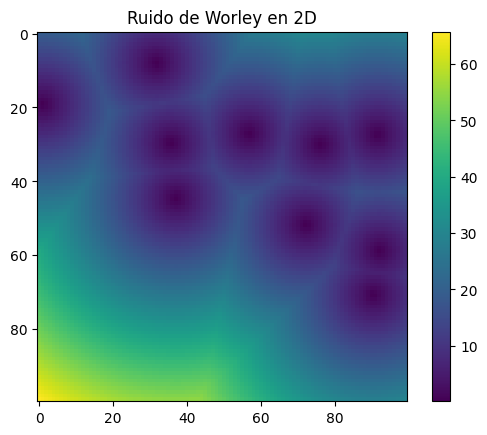

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def generate_worley_noise(n, num_points):
    # Genera puntos aleatorios en el rango [0, n) para la grilla 2D
    points = np.random.rand(num_points, 2) * n

    # Inicializa la matriz para almacenar el ruido de Worley
    worley_noise = np.zeros((n, n))

    # Itera sobre cada píxel en la grilla 2D
    for i in range(n):
        for j in range(n):
            # Calcula la distancia al punto generador más cercano
            distances = np.linalg.norm(points - np.array([i, j]), axis=1)
            
            # Asigna el valor de la distancia al punto generador más cercano como el valor de ruido
            worley_noise[i, j] = np.min(distances)

    return worley_noise

# Parámetros
n = 100  # Lado de la grilla
num_points = 10  # Número de puntos generadores

# Genera el ruido de Worley
worley_noise = generate_worley_noise(n, num_points)

# Grafica el ruido de Worley
plt.imshow(worley_noise, cmap='viridis')
plt.title('Ruido de Worley en 2D')
plt.colorbar()
plt.show()


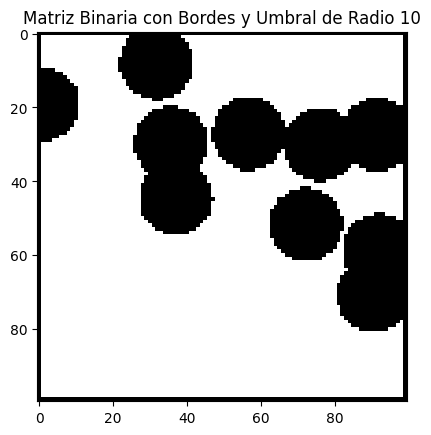

In [143]:
def threshold_worley_noise_with_borders(worley_noise, threshold_radius):
    # Crea una matriz binaria basada en el ruido de Worley y un umbral de radio
    binary_matrix = (worley_noise <= threshold_radius).astype(int)

    # Agrega bordes con valor 1
    binary_matrix[:, 0] = 1
    binary_matrix[:, -1] = 1
    binary_matrix[0, :] = 1
    binary_matrix[-1, :] = 1

    return binary_matrix

# Parámetro para el umbral de radio
threshold_radius = 10  # Puedes ajustar este valor según tus necesidades

# Aplica la transformación con bordes
binary_matrix_with_borders = threshold_worley_noise_with_borders(worley_noise, threshold_radius)

# Grafica la matriz binaria con bordes
plt.imshow(binary_matrix_with_borders, cmap='binary')
plt.title(f'Matriz Binaria con Bordes y Umbral de Radio {threshold_radius}')
plt.show()



Testeo:


In [147]:
def IsingPrueba(X0, n: int, beta: float, nf: int, p=2/3):
    # n, beta, nf
    '''
    Usando el método de Metropolis-Hasting, simula una CdM(μ, P) con P asociada a la distribución invariante pi.

    Parámetros
    ----------
    n : int
        Número de nodos desde -n, ..., 0 ,..., n.

    beta : float
        Parámetro de

    nf : int
        Número de pasos a simular.

    Retorno
    -------
    X : np.ndarray
        Arreglo con los valores de la CdM en cada paso.
    
    Ejemplo
    -------
    >>> nodos = 7
    >>> pasos = 8
    >>> beta = 1.2
    >>> X = Ising(nodos, beta, pasos, p=0.6)

    >>> for i in range(pasos-1):
    >>>     fila, columna = np.where(X[i+1]-X[i])
    >>>     print(f"[i],[j] = {fila},{columna}")
    '''
    u = np.random.uniform(size=nf)

    # Estado inicial
    X = []
    X.append(X0) # Nodo actual
    for n in range(nf - 1): 
        Y = funcion_transicion(funcion_R_metropolis, X[0])
        if u[n+1] <= np.exp(- beta * (funcion_H(Y) - funcion_H(X[0]))):
            X = [Y]
    return X

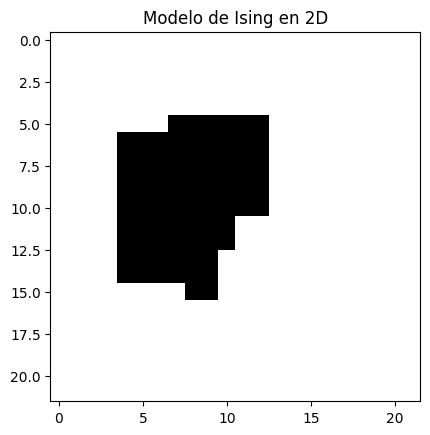

In [184]:
import numpy as np
import matplotlib.pyplot as plt

def plot_ising_model(spins):
    plt.imshow(spins, cmap='binary_r', interpolation='none')
    plt.title('Modelo de Ising en 2D')
    plt.show()

def ising_step(spins, temperature):
    size = spins.shape[0]
    i, j = np.random.randint(1, size-1, size=2)
    
    current_energy = -spins[i, j] * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    new_spin = -spins[i, j]
    new_energy = -new_spin * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    
    delta_energy = new_energy - current_energy

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] = new_spin

# Parámetros del modelo
n = 20
temperature = 1.0

# Inicializa la matriz de espines con bordes (aquí con un ejemplo de estado inicial)
initial_state = np.ones((n + 2, n + 2), dtype=int)
initial_state[1:-1, 1:-1] = np.random.choice([-1, 1], size=(n, n))

# Número de pasos de Monte Carlo
num_steps = 10000

# Realiza los pasos de Monte Carlo a partir del estado inicial
for step in range(num_steps):
    ising_step(initial_state, temperature)

# Grafica la configuración final
plot_ising_model(initial_state)

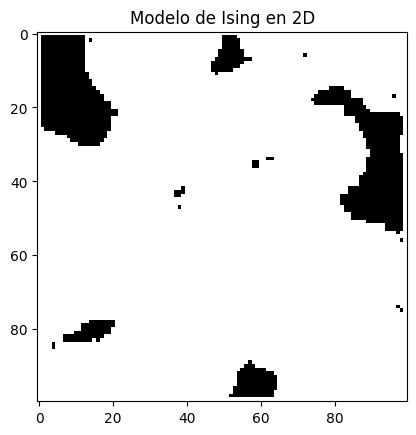

In [336]:
import numpy as np
import matplotlib.pyplot as plt

def generate_worley_noise(n, num_points):
    points = np.random.rand(num_points, 2) * n
    worley_noise = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances = np.linalg.norm(points - np.array([i, j]), axis=1)
            worley_noise[i, j] = np.min(distances)

    return worley_noise

def threshold_worley_noise_with_borders(worley_noise, threshold_radius):
    binary_matrix = (worley_noise <= threshold_radius).astype(int)

    # Agrega bordes con valor 1
    binary_matrix[:, 0] = 1
    binary_matrix[:, -1] = 1
    binary_matrix[0, :] = 1
    binary_matrix[-1, :] = 1

    return binary_matrix

def initialize_ising_model_with_condition(worley_condition):
    # Inicializa una matriz de espines con base en la condición inicial de Worley
    ising_model = worley_condition.copy()

    # Convierte los 0 a -1 para el modelo de Ising
    ising_model[ising_model == 0] = -1

    return ising_model

def plot_ising_model(spins):
    plt.imshow(spins, cmap='binary_r', interpolation='none')
    plt.title('Modelo de Ising en 2D')
    plt.show()

def ising_step(spins, temperature):
    size = spins.shape[0]
    i, j = np.random.randint(1, size-1, size=2)
    
    current_energy = -spins[i, j] * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    new_spin = -spins[i, j]
    new_energy = -new_spin * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    
    delta_energy = new_energy - current_energy

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] = new_spin

# Parámetros
n = 100
num_points = 50
threshold_radius = 13
temperature = 1.0
num_steps = 10000

# Genera el ruido de Worley
worley_noise = generate_worley_noise(n, num_points)

# Aplica el umbral y agrega bordes
worley_condition = threshold_worley_noise_with_borders(worley_noise, threshold_radius)

# Inicializa el modelo de Ising con la condición de Worley
ising_model = initialize_ising_model_with_condition(worley_condition)

# Realiza los pasos de Monte Carlo
for step in range(num_steps):
    ising_step(ising_model, temperature)

# Grafica la configuración final
plot_ising_model(ising_model)

Parece que con los siguientes parametros:

n = 100
num_points = 50
threshold_radius = 13
temperature = 1.0
num_steps = 10000

se obtienen resultados bonitos.

Con esferas con ruido:

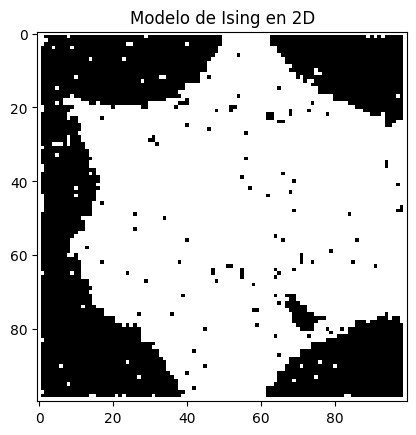

In [345]:
import numpy as np
import matplotlib.pyplot as plt

def generate_worley_noise(n, num_points):
    points = np.random.rand(num_points, 2) * n
    worley_noise = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances = np.linalg.norm(points - np.array([i, j]), axis=1)
            worley_noise[i, j] = np.min(distances)

    return worley_noise

def generate_sphere_with_noise(n, num_points, base_radius, noise_factor):
    worley_noise = generate_worley_noise(n, num_points)
    sphere = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distance_to_center = np.linalg.norm([i, j] - np.array([n/2, n/2]))
            sphere[i, j] = distance_to_center - base_radius - noise_factor * worley_noise[i, j]

    return sphere

def threshold_sphere_with_borders(sphere, threshold_radius):
    binary_matrix = (sphere <= threshold_radius).astype(int)

    # Agrega bordes con valor 1
    binary_matrix[:, 0] = 1
    binary_matrix[:, -1] = 1
    binary_matrix[0, :] = 1
    binary_matrix[-1, :] = 1

    return binary_matrix

def initialize_ising_model_with_condition(worley_condition):
    ising_model = worley_condition.copy()
    ising_model[ising_model == 0] = -1
    return ising_model

def plot_ising_model(spins):
    plt.imshow(spins, cmap='binary_r', interpolation='none')
    plt.title('Modelo de Ising en 2D')
    plt.show()

def ising_step(spins, temperature):
    size = spins.shape[0]
    i, j = np.random.randint(1, size-1, size=2)
    
    current_energy = -spins[i, j] * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    new_spin = -spins[i, j]
    new_energy = -new_spin * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    
    delta_energy = new_energy - current_energy

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] = new_spin

# Parámetros
n = 100
num_points = 10
base_radius = 13 # Radio base de la esfera
noise_factor = 1.1  # Factor de ruido para el radio
temperature = 2.0
num_steps = 10000

# Genera la esfera con ruido
sphere_with_noise = generate_sphere_with_noise(n, num_points, base_radius, noise_factor)

# Aplica el umbral y agrega bordes
worley_condition = threshold_sphere_with_borders(sphere_with_noise, base_radius)

# Inicializa el modelo de Ising con la condición de Worley
ising_model = initialize_ising_model_with_condition(worley_condition)

# Realiza los pasos de Monte Carlo
for step in range(num_steps):
    ising_step(ising_model, temperature)

# Grafica la configuración final
plot_ising_model(ising_model)


Ahora se probara con un radio base aleatorio dentro de un rango posible:

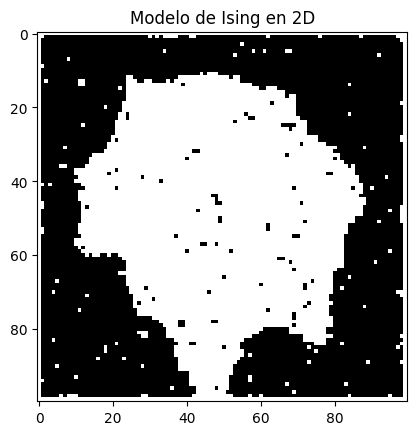

In [386]:
import numpy as np
import matplotlib.pyplot as plt

def generate_worley_noise(n, num_points):
    points = np.random.rand(num_points, 2) * n
    worley_noise = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances = np.linalg.norm(points - np.array([i, j]), axis=1)
            worley_noise[i, j] = np.min(distances)

    return worley_noise

def generate_sphere_with_noise(n, num_points, min_base_radius, max_base_radius, noise_factor):
    base_radius = np.random.uniform(min_base_radius, max_base_radius)
    worley_noise = generate_worley_noise(n, num_points)
    sphere = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distance_to_center = np.linalg.norm([i, j] - np.array([n/2, n/2]))
            sphere[i, j] = distance_to_center - base_radius - noise_factor * worley_noise[i, j]

    return sphere

def threshold_sphere_with_borders(sphere, threshold_radius):
    binary_matrix = (sphere <= threshold_radius).astype(int)

    # Agrega bordes con valor 1
    binary_matrix[:, 0] = 1
    binary_matrix[:, -1] = 1
    binary_matrix[0, :] = 1
    binary_matrix[-1, :] = 1

    return binary_matrix

def initialize_ising_model_with_condition(worley_condition):
    ising_model = worley_condition.copy()
    ising_model[ising_model == 0] = -1
    return ising_model

def plot_ising_model(spins):
    plt.imshow(spins, cmap='binary_r', interpolation='none')
    plt.title('Modelo de Ising en 2D')
    plt.show()

def ising_step(spins, temperature):
    size = spins.shape[0]
    i, j = np.random.randint(1, size-1, size=2)
    
    current_energy = -spins[i, j] * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    new_spin = -spins[i, j]
    new_energy = -new_spin * (spins[(i+1)%size, j] + spins[i-1, j] + spins[i, (j+1)%size] + spins[i, j-1])
    
    delta_energy = new_energy - current_energy

    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] = new_spin


# Parámetros
n = 100
num_points = 30
min_base_radius = 5.0
max_base_radius = 15.0
noise_factor = 5.0
noise_factor = 1.01  # Factor de ruido para el radio
temperature = 2
num_steps = 10000

# Genera la esfera con ruido y base_radius aleatorio
sphere_with_noise = generate_sphere_with_noise(n, num_points, min_base_radius, max_base_radius, noise_factor)

# Aplica el umbral y agrega bordes
worley_condition = threshold_sphere_with_borders(sphere_with_noise, max_base_radius)

# Inicializa el modelo de Ising con la condición de Worley
ising_model = initialize_ising_model_with_condition(worley_condition)

# Realiza los pasos de Monte Carlo
for step in range(num_steps):
    ising_step(ising_model, temperature)

# Grafica la configuración final
plot_ising_model(ising_model)
